# Logistic Regression
- Iris dataset
- Multiclass classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from PlotFunction import plot_decision_surface_train_test, plot_decision_surface_predict

In [2]:
# Load data
iris = datasets.load_iris()

In [3]:
# Extract the last 2 columns
X = iris.data[:, 2:4]
y = iris.target

In [4]:
# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1, stratify=y)

In [5]:
# Standardization
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [6]:
# Hyper-parameters
solver='lbfgs'
C=0.0001
max_iter=100

In [7]:
# Logistic regression object
lr = LogisticRegression(
    random_state=1,
    verbose=1,
    solver=solver,
    C=C,
    max_iter=max_iter)

In [8]:
# Training
lr.fit(X_train_std, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=0.0001, random_state=1, verbose=1)

In [9]:
# Prediction from test data
y_pred = lr.predict(X_test_std)

In [10]:
# How class label is predicted from probability.
comb = np.concatenate((X_test_std, lr.predict_proba(X_test_std), y_pred.reshape(-1,1)), axis=1) 
temp = pd.DataFrame(comb, columns=['X1_std','X2_std','Prob of Class 0', 'Prob of Class 1', 'Prob of Class 2', 'Prediction'])
temp.head()

,X1_std,X2_std,Prob of Class 0,Prob of Class 1,Prob of Class 2,Prediction
0,0.898203,1.445879,0.329891,0.333881,0.336228,2.0
1,-1.165380,-1.045078,0.336612,0.332760,0.330628,0.0
2,-1.332697,-1.176181,0.337056,0.332680,0.330264,0.0
3,0.396250,0.659261,0.331782,0.333581,0.334637,2.0
4,0.340478,0.265952,0.332435,0.333490,0.334075,2.0


In [11]:
# Norm of weight coefficients (affected by C values)
print(f"Norm of W: {np.linalg.norm(lr.coef_)}")

Norm of W: 0.008225699269087432


In [12]:
# Printing results
sumMiss = (y_test != y_pred).sum()
accuracyScore = accuracy_score(y_test, y_pred)
print(f"Misclassified examples: {sumMiss}")
print(f"Accuracy score: {accuracyScore}")

Misclassified examples: 15
Accuracy score: 0.6666666666666666


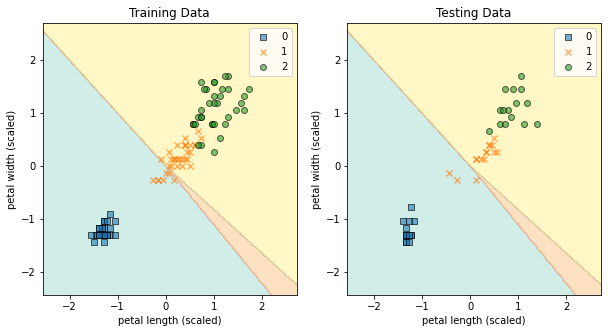

In [13]:
# Plot decision regions
plot_decision_surface_train_test(X_train_std, X_test_std, y_train, y_test, lr)

## Searching for best parameters

In [14]:
paramSet = {
    "ex1": {"solver": "lbfgs", "C": 0.0001, "max_iter": 100},
    "ex2": {"solver": "lbfgs", "C": 0.01, "max_iter": 100},
    "ex3": {"solver": "lbfgs", "C": 1, "max_iter": 100},
    "ex4": {"solver": "lbfgs", "C": 100, "max_iter": 100},
    "ex5": {"solver": "lbfgs", "C": 10000, "max_iter": 100},
}

Parameters: {'solver': 'lbfgs', 'C': 0.0001, 'max_iter': 100}
Misclassified examples: 15
Accuracy score: 0.6666666666666666
Norm of W: 0.008225699269087432
--------------------------------------------------
Parameters: {'solver': 'lbfgs', 'C': 0.01, 'max_iter': 100}
Misclassified examples: 10
Accuracy score: 0.7777777777777778
Norm of W: 0.5080516881527405
--------------------------------------------------
Parameters: {'solver': 'lbfgs', 'C': 1, 'max_iter': 100}
Misclassified examples: 1
Accuracy score: 0.9777777777777777
Norm of W: 4.5061151598045734
--------------------------------------------------
Parameters: {'solver': 'lbfgs', 'C': 100, 'max_iter': 100}
Misclassified examples: 1
Accuracy score: 0.9777777777777777
Norm of W: 14.12160044479269
--------------------------------------------------
Parameters: {'solver': 'lbfgs', 'C': 10000, 'max_iter': 100}
Misclassified examples: 1
Accuracy score: 0.9777777777777777
Norm of W: 20.93773288504392
----------------------------------------

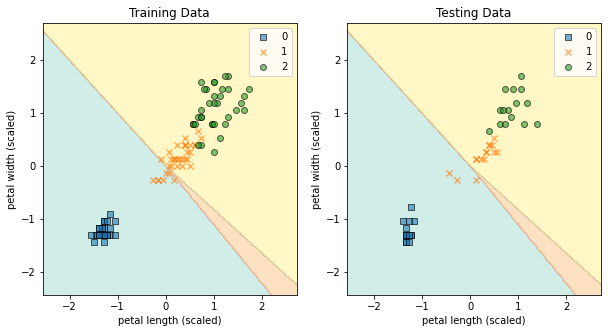

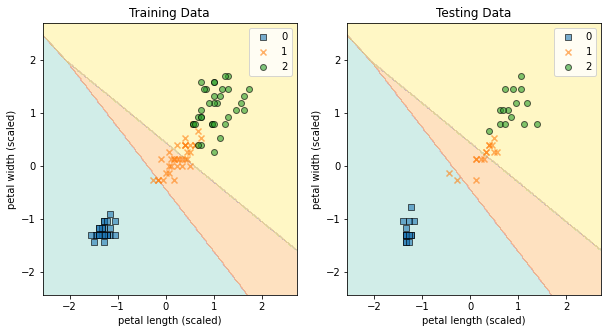

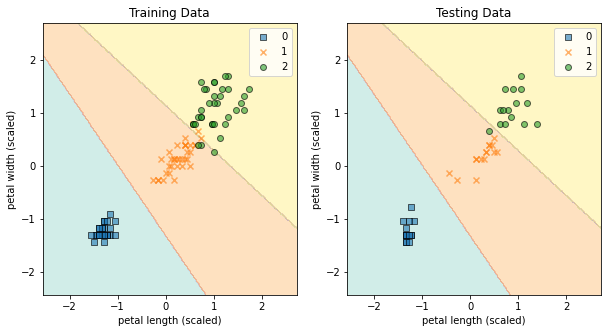

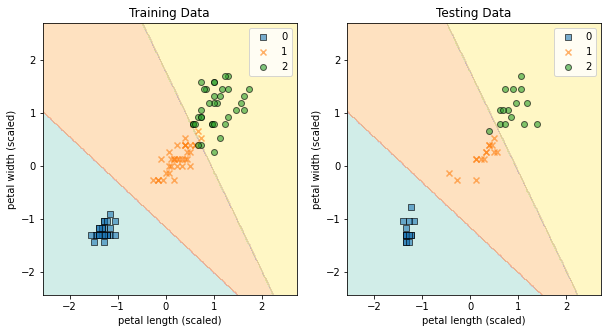

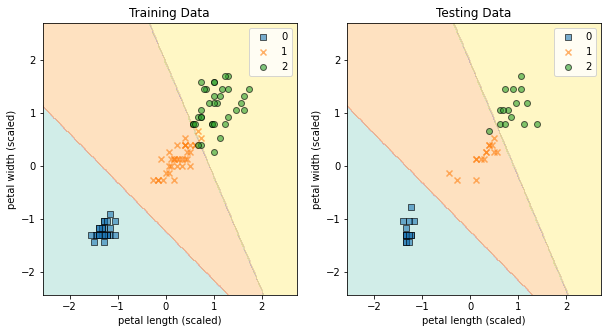

In [15]:
for paramName, paramValue in paramSet.items():
    lr = LogisticRegression(
        random_state=1,
        verbose=0,
        solver=paramValue["solver"],
        C=paramValue["C"],
        max_iter=paramValue["max_iter"],
    )

    # Training
    lr.fit(X_train_std, y_train)

    # Prediction
    y_pred = lr.predict(X_test_std)

    # Misclassification from the test samples
    sumMiss = (y_test != y_pred).sum()

    # Accuracy score from the test samples
    accuracyScore = accuracy_score(y_test, y_pred)

    print(f"Parameters: {paramValue}")
    print(f"Misclassified examples: {sumMiss}")
    print(f"Accuracy score: {accuracyScore}")
    print(f"Norm of W: {np.linalg.norm(lr.coef_)}")
    print(f"--------------------------------------------------")
    # Plot decision regions
    plot_decision_surface_train_test(
        X_train_std, X_test_std, y_train, y_test, lr, filename=f"Images/T21_Logistic_Regression_{paramName}.png"
    )